In [ ]:
#Adding Layers
#Create the Model
batch_size=128
num_classes=10
epochs=20
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
#Compiling the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.
Adadelta(),metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train,batch_size=20,epochs=5,verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
3000/3000 [==============================] - 229s 76ms/step - loss: 2.1810 - accuracy: 0.3175 - val_loss: 1.9819 - val_accuracy: 0.7165
Epoch 2/5
3000/3000 [==============================] - 227s 76ms/step - loss: 1.7478 - accuracy: 0.6036 - val_loss: 1.3542 - val_accuracy: 0.7788
Epoch 3/5
3000/3000 [==============================] - 228s 76ms/step - loss: 1.1958 - accuracy: 0.6954 - val_loss: 0.8358 - val_accuracy: 0.8239
Epoch 4/5
3000/3000 [==============================] - 223s 74ms/step - loss: 0.8753 - accuracy: 0.7474 - val_loss: 0.6115 - val_accuracy: 0.8491
Epoch 5/5
3000/3000 [==============================] - 223s 74ms/step - loss: 0.7234 - accuracy: 0.7811 - val_loss: 0.5068 - val_accuracy: 0.8654


In [ ]:
#Observing The Metrics
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.5067759156227112, 0.8654000163078308]


In [ ]:
#Test the model
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 111ms/step
[[1.18316652e-03 6.54777046e-04 2.88228184e-04 3.99719551e-03
  1.64188491e-03 7.98095716e-04 1.20877761e-04 9.83213007e-01
  1.99386710e-03 6.10900577e-03]
 [1.20167257e-02 4.49562911e-03 6.94662094e-01 1.37630254e-01
  1.06361411e-04 2.34117713e-02 1.06173731e-01 4.70910345e-05
  2.13511679e-02 1.05228384e-04]
 [2.05710274e-03 9.10915077e-01 1.94862206e-02 1.12837330e-02
  7.71390833e-03 3.92034184e-03 5.97504061e-03 1.45084700e-02
  1.80215389e-02 6.11856673e-03]
 [9.48696077e-01 2.91711458e-05 1.40612049e-03 6.96549891e-03
  3.35446617e-04 9.49487928e-03 2.84894984e-02 7.24729500e-04
  2.84644100e-03 1.01209967e-03]]


In [ ]:
#save the model
model.save('digit_classifier.h5')

1/1 [==============================] - 0s 72ms/step
2


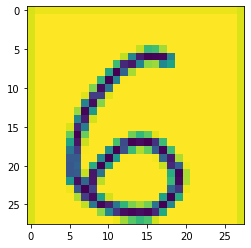

In [ ]:
#TEST WITH SAVED MODEL
from keras.utils.image_utils import img_to_array
from tensorflow.keras.models import load_model
model = load_model('/content/digit_classifier.h5')
from PIL import Image
import numpy as np

img = Image.open('/content/sample.png').convert("L")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

#display the image
import matplotlib.pyplot as plt
plt.imshow(img)

#predict the image
y_predict = model.predict(im2arr)
print(np.argmax(y_predict[0]))